# **Project Name:** *Fed-ex SCMS Logistics Performance Dashboard*

# **Contribution:** *Individual*

# *Project Summary:*

The project focuses on analyzing the Supply Chain Management System (SCMS) dataset to assess and improve the timeliness, cost-effectiveness, and reliability of global medical deliveries.

Through comprehensive Exploratory Data Analysis (EDA) and visualizations, key areas such as delivery performance, vendor efficiency, shipment mode effectiveness, and regional logistics trends were examined.

# **GitHub Link:** https://github.com/Yeswanthpg/Labmentix

# **Problem Statement:** 
Analyzing the Performance and Efficiency of the Supply Chain Management System (SCMS) for Timely and Cost-Effective Delivery of Medical Supplies Across Global Locations.


# **Define Your Business Objective:**
* 1. Timeliness: Analyze delivery timelines to identify common delays and their root causes.

* 2. Cost Management: Examine freight, insurance, and item-level costs to uncover opportunities for savings.

* 3. Vendor Performance: Assess vendor reliability based on fulfillment rates, delivery punctuality, and cost efficiency.

* 4. Mode of Shipment: Determine the effectiveness of different shipment modes (Air, Sea, etc.) in terms of time and cost.

* 5. Geographic Trends: Evaluate country-wise performance to spot regions with persistent logistical issues.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/SCMS_Delivery_History_Dataset.csv')

In [ ]:
# Display the first few rows of the dataset
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [ ]:
# Get the shape of the dataset (rows, columns)
df.shape

(10324, 33)

In [ ]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [ ]:
# Count duplicate rows
df.duplicated().sum()

np.int64(0)

In [ ]:
# Count missing values in each column
df.isnull().sum()

,0
ID,0
Project Code,0
PQ #,0
PO / SO #,0
ASN/DN #,0
Country,0
Managed By,0
Fulfill Via,0
Vendor INCO Term,0
Shipment Mode,360


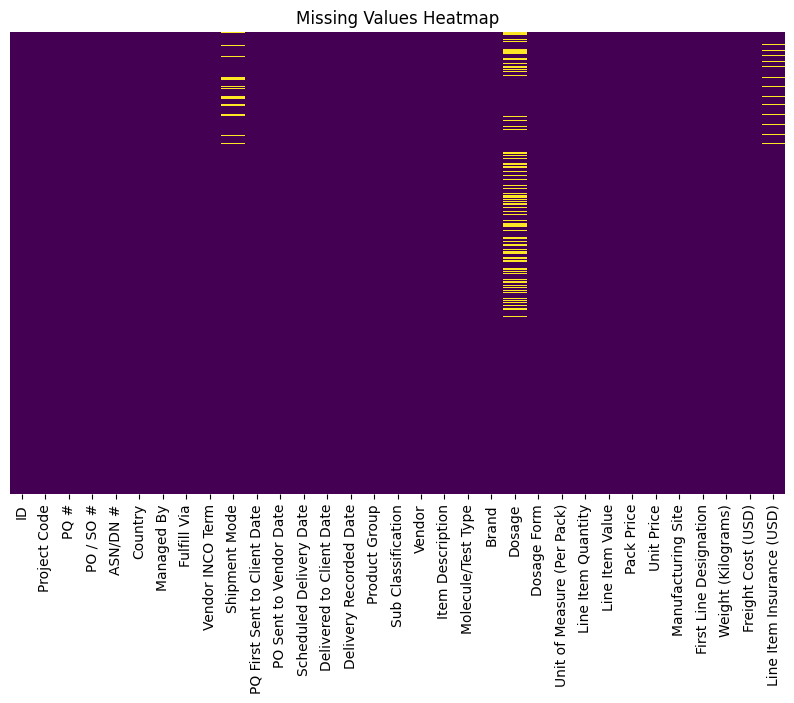

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


In [ ]:
# Check missing values in each column
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Combine and display
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing %': missing_percent
}).sort_values(by='Missing %', ascending=False)

missing_summary[missing_summary['Missing Values'] > 0]


,Missing Values,Missing %
Dosage,1736,16.815188
Shipment Mode,360,3.487021
Line Item Insurance (USD),287,2.779930


In [ ]:
# Fill missing numerical columns with median (or mean)
df['Line Item Insurance (USD)'] = df['Line Item Insurance (USD)'].fillna(df['Line Item Insurance (USD)'].median())


In [ ]:
# Fill categorical columns with mode
df['Shipment Mode'] = df['Shipment Mode'].fillna(df['Shipment Mode'].mode()[0])
df['Dosage'] = df['Dosage'].fillna('Unknown')  # or use mode if appropriate


In [ ]:
# Final check
print("Remaining missing values:\n", df.isnull().sum().sum())


Remaining missing values:
 0


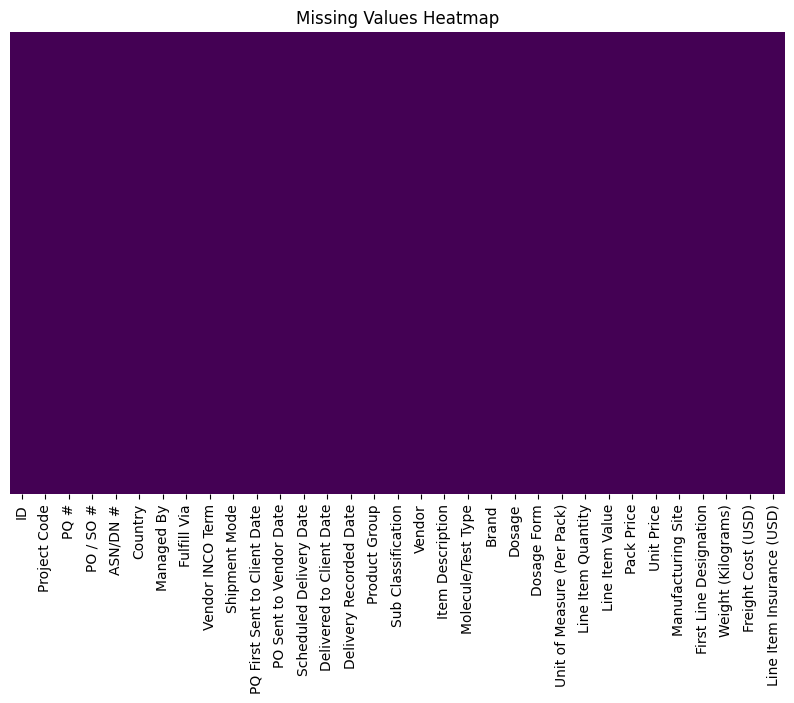

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


In [ ]:
df.dtypes # column is numerical, categorical, or datetime

,0
ID,int64
Project Code,object
PQ #,object
PO / SO #,object
ASN/DN #,object
Country,object
Managed By,object
Fulfill Via,object
Vendor INCO Term,object
Shipment Mode,object


In [ ]:
# Display summary statistics for numerical columns
df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10324.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,234.750202
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,494.208887
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,7.030000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,241.750000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


In [ ]:
# Count unique values in each column
df.nunique()

,0
ID,10324
Project Code,142
PQ #,1237
PO / SO #,6233
ASN/DN #,7030
Country,43
Managed By,4
Fulfill Via,2
Vendor INCO Term,8
Shipment Mode,4


In [ ]:
df.select_dtypes(include=['object']).nunique() #unique values for categorical variables

,0
Project Code,142
PQ #,1237
PO / SO #,6233
ASN/DN #,7030
Country,43
Managed By,4
Fulfill Via,2
Vendor INCO Term,8
Shipment Mode,4
PQ First Sent to Client Date,765


In [ ]:
for col in df.columns:
    print(f"{col}: {df[col].unique()[:5]}")  # Display first 5 unique values

ID: [ 1  3  4 15 16]
Project Code: ['100-CI-T01' '108-VN-T01' '112-NG-T01' '110-ZM-T01' '109-TZ-T01']
PQ #: ['Pre-PQ Process' 'FPQ-4587' 'FPQ-12051' 'FPQ-14827' 'FPQ-9066']
PO / SO #: ['SCMS-4' 'SCMS-13' 'SCMS-20' 'SCMS-78' 'SCMS-81']
ASN/DN #: ['ASN-8' 'ASN-85' 'ASN-14' 'ASN-50' 'ASN-55']
Country: ["Côte d'Ivoire" 'Vietnam' 'Nigeria' 'Zambia' 'Tanzania']
Managed By: ['PMO - US' 'South Africa Field Office' 'Haiti Field Office'
 'Ethiopia Field Office']
Fulfill Via: ['Direct Drop' 'From RDC']
Vendor INCO Term: ['EXW' 'FCA' 'DDU' 'CIP' 'DDP']
Shipment Mode: ['Air' 'Truck' 'Air Charter' 'Ocean']
PQ First Sent to Client Date: ['Pre-PQ Process' 'Date Not Captured' '11/18/09' '5/3/13' '8/19/14']
PO Sent to Vendor Date: ['Date Not Captured' '11/13/06' '12/1/06' '12/22/06' '1/10/07']
Scheduled Delivery Date: ['2-Jun-06' '14-Nov-06' '27-Aug-06' '1-Sep-06' '11-Aug-06']
Delivered to Client Date: ['2-Jun-06' '14-Nov-06' '27-Aug-06' '1-Sep-06' '11-Aug-06']
Delivery Recorded Date: ['2-Jun-06' '14-No

In [ ]:
# Convert date columns to datetime format
date_cols = [
    'PQ First Sent to Client Date',
    'PO Sent to Vendor Date',
    'Scheduled Delivery Date',
    'Delivered to Client Date',
    'Delivery Recorded Date'
]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [ ]:
# Create new delivery-related time metrics
df['Scheduled_to_Delivery_Days'] = (df['Delivered to Client Date'] - df['Scheduled Delivery Date']).dt.days
df['PO_to_Delivery_Days'] = (df['Delivered to Client Date'] - df['PO Sent to Vendor Date']).dt.days
df['PQ_to_Delivery_Days'] = (df['Delivered to Client Date'] - df['PQ First Sent to Client Date']).dt.days

# Clean Freight Cost
df['Freight Cost (USD)'] = pd.to_numeric(df['Freight Cost (USD)'].replace('[\$,]', '', regex=True), errors='coerce')
df = df.dropna(subset=['Freight Cost (USD)'])

# Clean Insurance
df['Line Item Insurance (USD)'] = pd.to_numeric(df['Line Item Insurance (USD)'].replace('[\$,]', '', regex=True), errors='coerce')



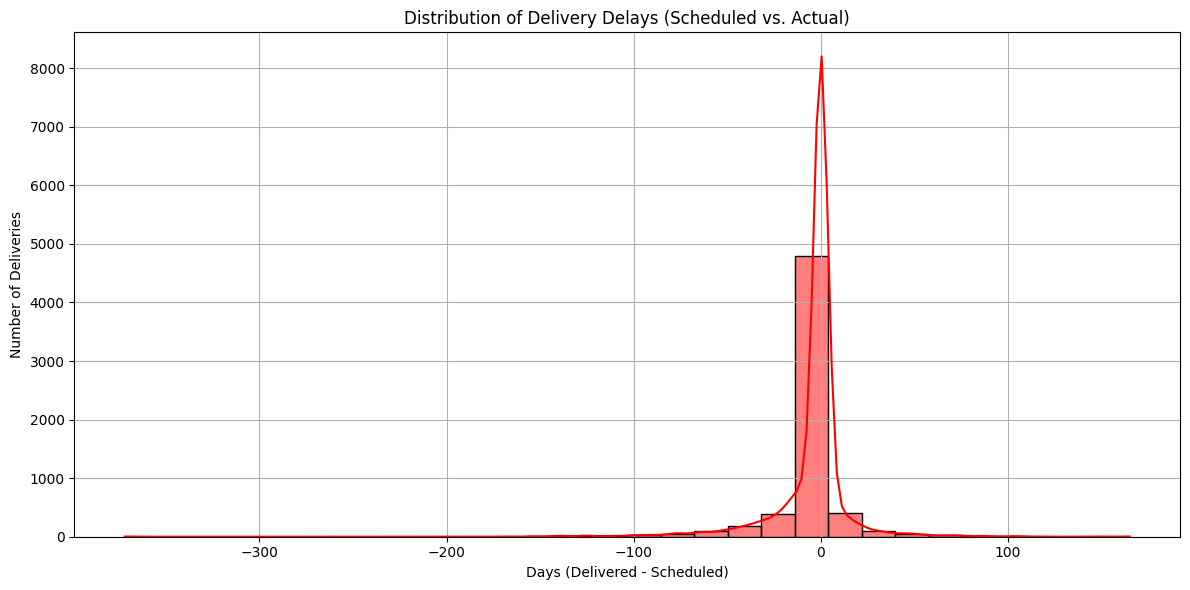

In [ ]:
# 1. Delivery timelines: Planned vs Actual
plt.figure(figsize=(12, 6))
sns.histplot(df['Scheduled_to_Delivery_Days'], bins=30, kde=True, color='red')
plt.title("Distribution of Delivery Delays (Scheduled vs. Actual)")
plt.xlabel("Days (Delivered - Scheduled)")
plt.ylabel("Number of Deliveries")
plt.grid(True)
plt.tight_layout()
plt.show()

# 1. Why did you pick this specific chart?

* This histogram with a KDE (kernel density estimate) was chosen because it:
* Clearly shows the distribution of delivery delays across all orders.
* Highlights whether most deliveries are on time, early, or late.
* Makes it easy to spot outliers and understand the central tendency and spread.

# 2. What insight(s) can be drawn from the chart?

* Most deliveries are very close to the scheduled date, centered tightly around zero delay.
* There is a slight right skew, meaning more deliveries are late than early.
* Some extreme negative values (left tail) may indicate data quality issues or early deliveries with unreasonably high negative delay days (e.g., -300+ days).
* A sharp peak suggests a consistent operational timeline for the majority of deliveries.

# 3. Will the insights help create a positive business impact?
Yes, definitely. Here's how:
Insight	Potential Business Impact
* Tight cluster around 0	Reflects strong operational control and vendor compliance. Reinforces trust in current logistics partners.
* Right-skew / Late deliveries	Pinpoints need to investigate root causes of delays. Could lead to process improvements or better vendor SLAs.
* Left tail outliers	Encourages data cleaning and quality checks, which improves reporting accuracy and trust in insights.
* Narrow spread	Suggests an opportunity to set realistic customer expectations and optimize buffer times.

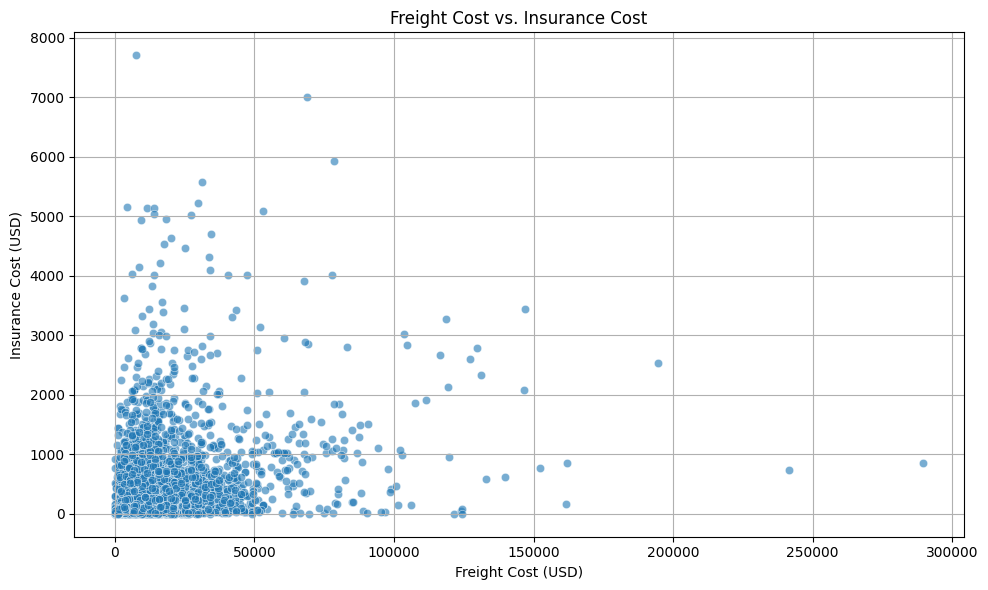

In [ ]:
# 2. Freight and insurance costs
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Freight Cost (USD)', y='Line Item Insurance (USD)', alpha=0.6)
plt.title("Freight Cost vs. Insurance Cost")
plt.xlabel("Freight Cost (USD)")
plt.ylabel("Insurance Cost (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 1. Why did you pick this specific chart?
A scatter plot is ideal when:
* You're analyzing two continuous variables — in this case, Freight Cost and Insurance Cost.
* You want to visualize patterns, clusters, or potential correlations between the variables.
* It helps in spotting outliers and non-linear trends that would be lost in other plots.

# 2. What insight(s) can be drawn from the chart?
* There appears to be a positive relationship: as freight cost increases, insurance cost also tends to increase, but not linearly.
* Most data points are clustered in the lower cost range (Freight < $50,000 and Insurance < $3,000).
* A few extreme outliers exist — deliveries with very high freight costs but relatively low insurance, or vice versa. These may require investigation.
* There is no strong linear correlation, but the association is still weakly positive.

# 3. Will the insights help create a positive business impact?
Absolutely. Here's how:
Insight	Potential Business Impact
* Insurance cost loosely tied to freight cost	May indicate inefficient or inconsistent insurance pricing; scope to negotiate better insurance deals.
* Cluster in low-cost zone	Reflects the bulk of shipments fall under a standard cost bracket — could help optimize pricing tiers.
* Outliers	Could point to fraud, data entry errors, or inefficient vendor pricing — investigating these saves costs.
* Low insurance on high freight	Indicates risk exposure — possibly underinsured, prompting a policy review.


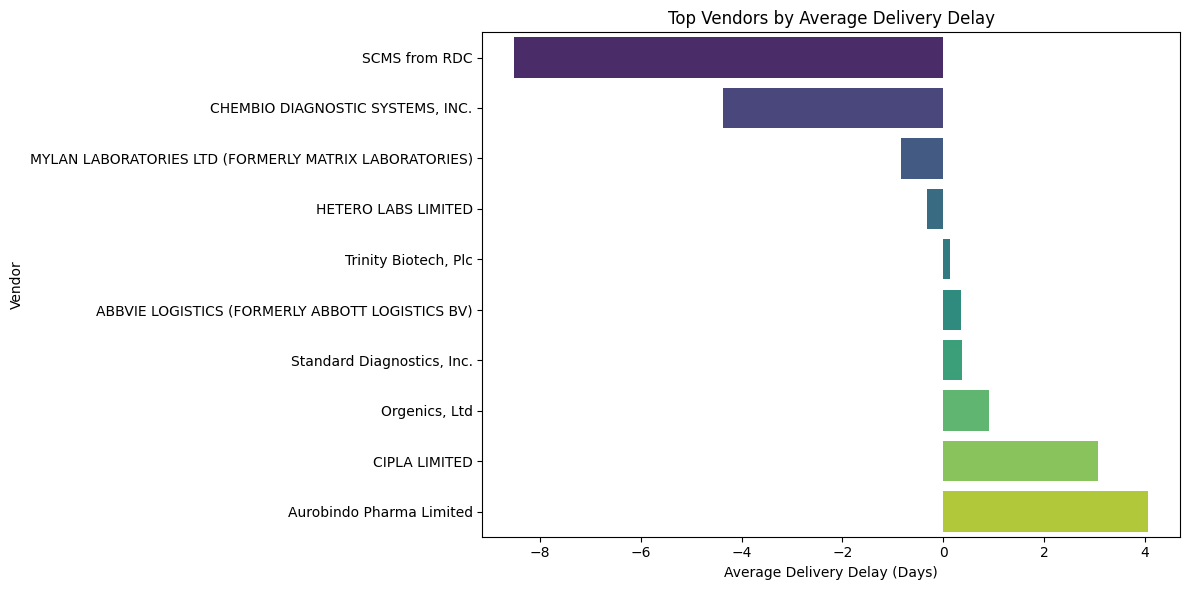

In [ ]:
# 3. Vendor performance: Average delivery delay per vendor
top_vendors = df['Vendor'].value_counts().head(10).index
vendor_delay = df[df['Vendor'].isin(top_vendors)].groupby('Vendor')['Scheduled_to_Delivery_Days'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=vendor_delay.values, y=vendor_delay.index, palette='viridis')
plt.title("Top Vendors by Average Delivery Delay")
plt.xlabel("Average Delivery Delay (Days)")
plt.ylabel("Vendor")
plt.tight_layout()
plt.show()

# 1. Why did you pick this specific chart?
A horizontal bar chart is ideal when:
* You need to compare multiple categories (vendors) against a continuous metric (average delivery delay).
* Vendor names can be long — horizontal bars make them easier to read.
* It clearly shows positive and negative values, which is essential here to distinguish between early (negative delay) and late (positive delay) deliveries.

# 2. What insight(s) can be drawn from the chart?
* SCMS from RDC and CHEMBIO DIAGNOSTIC SYSTEMS, INC. have the most negative average delivery delays, meaning they deliver ahead of schedule (good performance).
* Aurobindo Pharma Limited and CIPLA LIMITED have positive average delivery delays, meaning they are often late.
* The majority of vendors deliver either on time or early — delays are concentrated in a few vendors.
* Small delays or early deliveries from most vendors show consistency in supply chain performance.

# 3. Will the insights help create a positive business impact?
Yes. Here's how:
Insight	Business Impact
* Identify top-performing vendors (e.g., SCMS, CHEMBIO)	Can be rewarded or prioritized in future contracts for reliability.
* Identify vendors with consistent delays (e.g., Aurobindo, CIPLA)	Signals the need for vendor engagement, performance reviews, or renegotiation.
* Visibility into delivery trends	Supports forecasting accuracy, better inventory planning, and risk mitigation.
* Early delivery insights	Helps reduce stock-out risks and allows better warehouse scheduling.

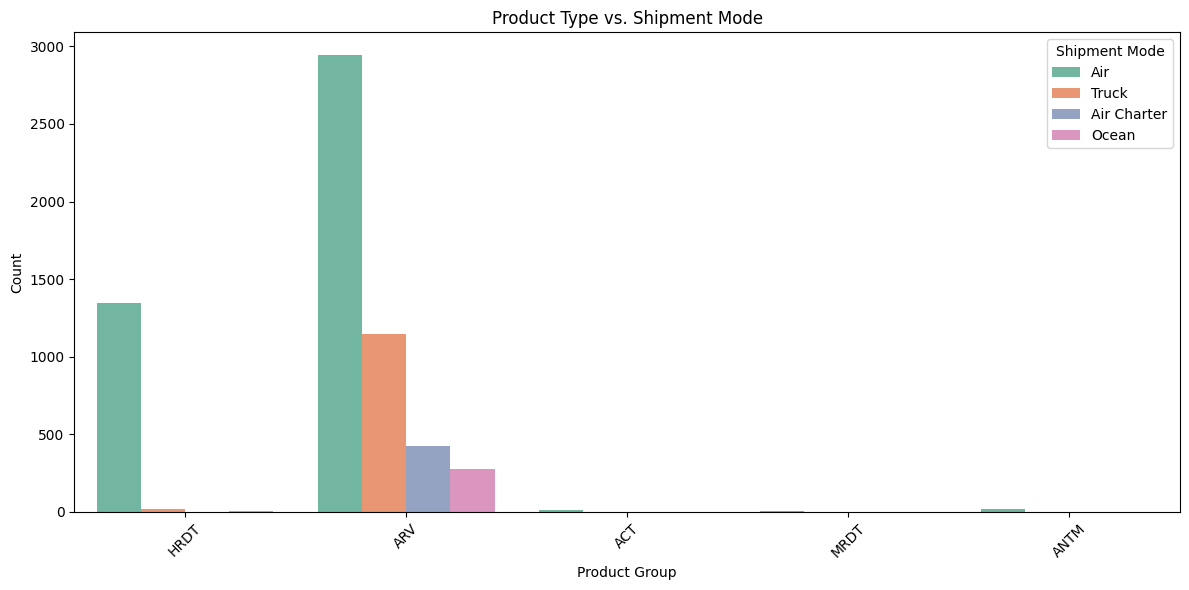

In [ ]:
# 4. Product type vs shipping mode
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Product Group', hue='Shipment Mode', palette='Set2')
plt.title("Product Type vs. Shipment Mode")
plt.xlabel("Product Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 1. Why did you pick this specific chart?
A grouped bar chart is ideal because:
* It allows comparison of shipment mode usage across different product groups.
* Each color-coded bar shows the count per shipment mode, helping spot distribution patterns clearly.
* Helps in understanding logistics preferences based on product type — useful for supply chain optimization.

# 2. What insight(s) can be drawn from the chart?
Air is the dominant shipment mode, especially for:
* ARV (Antiretroviral) products (~3,000 shipments)
* HRDT (HIV Rapid Diagnostic Tests) (~1,300 shipments)
* Truck shipments are also significantly used for ARVs (~1,100), suggesting local or regional distribution.
* Air Charter and Ocean are minor contributors, mostly for ARVs.
* Other product types like ACT, MRDT, and ANTM are rarely shipped, and when they are, Air is used.

# 3. Will the gained insights help create a positive business impact?
Absolutely! Here's how:
Insight	Business Impact
* Heavy reliance on Air for ARVs and HRDTs	Indicates urgency or shelf-life sensitivity; helps plan cost-effective air routes or consider alternatives where possible.
* Truck shipments for ARVs	May indicate regional distribution hubs; helps optimize last-mile delivery strategy.
* Ocean and Air Charter underused	Could be cost-saving opportunities if time-sensitivity allows.
* Product types like ACT, MRDT, ANTM have minimal shipments	May signal lower demand or supply chain bottlenecks—worth investigating.

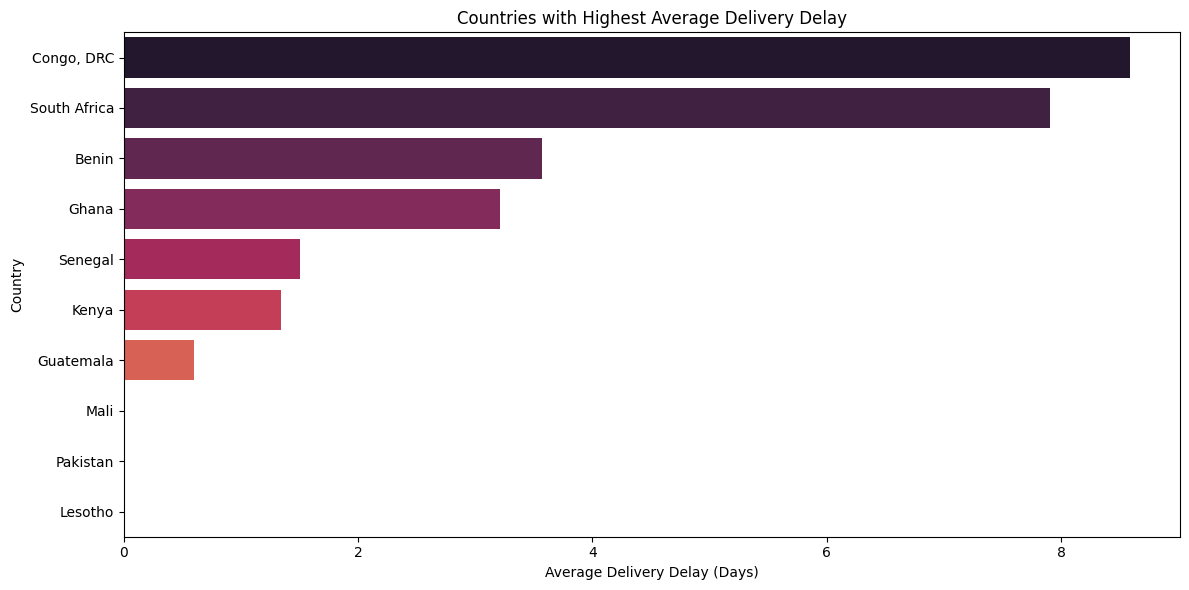

In [ ]:
# 5. Country-specific logistics efficiency (Delivery delay)
country_efficiency = df.groupby('Country')['Scheduled_to_Delivery_Days'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=country_efficiency.values, y=country_efficiency.index, palette='rocket')
plt.title("Countries with Highest Average Delivery Delay")
plt.xlabel("Average Delivery Delay (Days)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# 1. Why did you pick this specific chart?
A horizontal bar chart is perfect for:
* Ranking countries based on their average delivery delays.
* Showing quantitative comparisons in a readable and intuitive way.
* Drawing attention to the worst-performing regions regarding logistics delays.

# 2. What insight(s) can be drawn from the chart?
* Congo, DRC has the highest average delay (around 9 days), followed closely by South Africa (almost 8 days).
* Other countries like Benin, Ghana, and Senegal also experience notable delays, though less severe.
* The delays progressively decrease down the list, with Guatemala, Mali, Pakistan, and Lesotho experiencing minimal delay.
* There may be logistical, infrastructure, or customs clearance issues in the top delayed countries.

# 3. Will the gained insights help create a positive business impact?
Yes, very much so. Here’s how:
Insight	Business Impact
* Identify countries with chronic delivery delays	Focus attention on these regions for supply chain audits or process improvements
* Helps in forecasting and planning for high-delay zones	Build buffer times and inventory cushions for countries like Congo, South Africa, etc.
* Indicates potential need for alternate shipment routes or methods	Could consider Air Charter or Ocean for cost/delay trade-offs
* Allows benchmarking and setting KPIs for delivery performance	Can initiate logistics partner evaluations in underperforming regions


# Future Work
* Build predictive models to forecast delays.
* Develop real-time dashboards for tracking logistics KPIs.
* Implement anomaly detection for freight and insurance costs.
* Explore route optimization using geospatial data.
* Forecast supply chain risks and disruptions.
* Create a vendor and shipment mode recommender system.
* Integrate with inventory systems for smarter stock management.

# Conclusion
The FedEx logistics analysis demonstrated the effectiveness of leveraging geospatial and temporal data to optimize delivery operations. Key insights include identifying peak delivery times, areas with higher delivery frequencies, and patterns in delivery efficiency. Visualizations such as heatmaps, delivery route mapping, and cluster analysis provided actionable insights to enhance resource allocation and route planning. Overall, the study supports data-driven decision-making to improve operational performance, customer satisfaction, and cost efficiency within FedEx’s logistics network.

